In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [48]:
data = pd.read_csv('research.csv')
data.head()


,INDEX,Date,MAX,MIN,AW,RF,SSH
0,42971,01/01/1975,28.0,15.4,7.0,0.0,7.6
1,42971,02/01/1975,28.0,15.8,5.0,0.0,6.8
2,42971,03/01/1975,28.5,15.0,9.0,0.0,5.7
3,42971,04/01/1975,27.6,18.5,12.0,0.0,7.1
4,42971,05/01/1975,26.4,15.6,13.0,0.0,10.2


In [49]:
data.drop(["AW" , 'RF' , 'SSH','INDEX'] , axis=1, inplace=True)

In [50]:
data.head()


,Date,MAX,MIN
0,01/01/1975,28.0,15.4
1,02/01/1975,28.0,15.8
2,03/01/1975,28.5,15.0
3,04/01/1975,27.6,18.5
4,05/01/1975,26.4,15.6


In [51]:
data.dropna(inplace=True)

In [52]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Resample the data on a monthly basis and calculate the mean temperature
monthly_data = data.resample('M').mean()

# Output the monthly data
print(monthly_data)




                  MAX        MIN
Date                            
1975-01-31  27.845161  14.738710
1975-02-28  30.628571  19.078571
1975-03-31  35.016129  22.651613
1975-04-30  36.460000  25.426667
1975-05-31  38.235484  26.777419
...               ...        ...
2024-02-29  32.500000  20.331034
2024-03-31  34.860000  23.583333
2024-04-30  39.680000  25.773333
2024-05-31  38.203333  27.036667
2024-06-30  37.093333  27.263333

[594 rows x 2 columns]


C:\Users\dsmat\AppData\Local\Temp\ipykernel_10572\4274377568.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data.resample('M').mean()


In [53]:
# Setup
from datetime import datetime
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import sys, os
# from colorsetup import colors, palette
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.tsa.stattools as ts


In [54]:
monthly_data=monthly_data.drop(['MIN'],axis=1)


In [55]:
monthly_data.describe()


,MAX
count,566.000000
mean,32.950094
std,3.027909
min,26.738710
25%,30.955833
50%,32.359630
75%,35.296774
max,41.023333


In [56]:
monthly_data.reset_index()

,Date,MAX
0,1975-01-31,27.845161
1,1975-02-28,30.628571
2,1975-03-31,35.016129
3,1975-04-30,36.460000
4,1975-05-31,38.235484
...,...,...
589,2024-02-29,32.500000
590,2024-03-31,34.860000
591,2024-04-30,39.680000
592,2024-05-31,38.203333


In [57]:
f75_85 = monthly_data['1975-01-01':'1985-01-01']

In [58]:
f75_85.head()

,MAX
Date,
1975-01-31,27.845161
1975-02-28,30.628571
1975-03-31,35.016129
1975-04-30,36.460000
1975-05-31,38.235484


In [59]:
chunks = np.split(f75_85.MAX, indices_or_sections=12)

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


In [15]:
chunks[0]

Date
1975-01-31    27.845161
1975-02-28    30.628571
1975-03-31    35.016129
1975-04-30    36.460000
1975-05-31    38.235484
1975-06-30    36.041379
1975-07-31    31.880645
1975-08-31    30.925806
1975-09-30    31.553333
1975-10-31    32.100000
Freq: ME, Name: MAX, dtype: float64

In [19]:
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic           -2.698414
p-value                   0.074313
Lags Used                13.000000
Observations Used       106.000000
Critical Value (1%)      -3.493602
Critical Value (5%)      -2.889217
Critical Value (10%)     -2.581533
dtype: float64


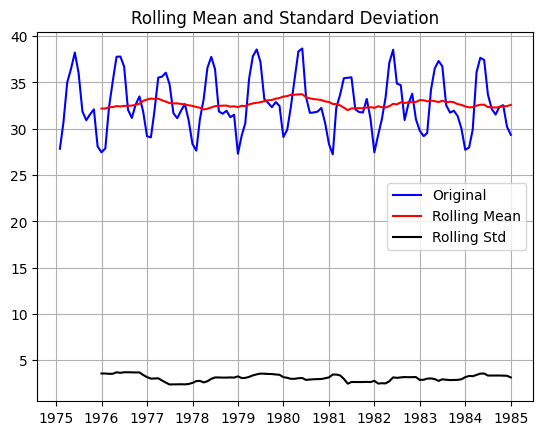

In [21]:
dftest(f75_85.MAX)


C:\Users\dsmat\AppData\Local\Temp\ipykernel_10572\3157899943.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f75_85['lag_12'] = f75_85.shift(12)
C:\Users\dsmat\AppData\Local\Temp\ipykernel_10572\3157899943.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f75_85['seasonal_diff'] = f75_85["MAX"] - f75_85['lag_12']


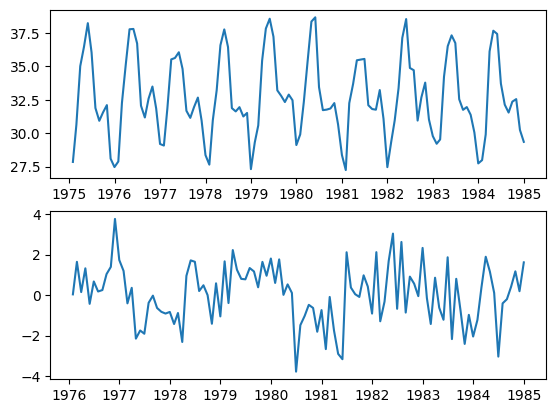

In [22]:
# Important to note that values have strong seasonality and adf test as well as rolling mean may not capture this.
# That is why it is always important to pay attention to run sequence plot
f75_85['lag_12'] = f75_85.shift(12)
f75_85['seasonal_diff'] = f75_85["MAX"] - f75_85['lag_12']

fig,axes = plt.subplots(2,1)
axes[0].plot(f75_85.MAX,label ='original')
axes[1].plot(f75_85.seasonal_diff,label = 'seasonal diff')

Test Statistic          -4.706280
p-value                  0.000082
Lags Used               11.000000
Observations Used       96.000000
Critical Value (1%)     -3.500379
Critical Value (5%)     -2.892152
Critical Value (10%)    -2.583100
dtype: float64


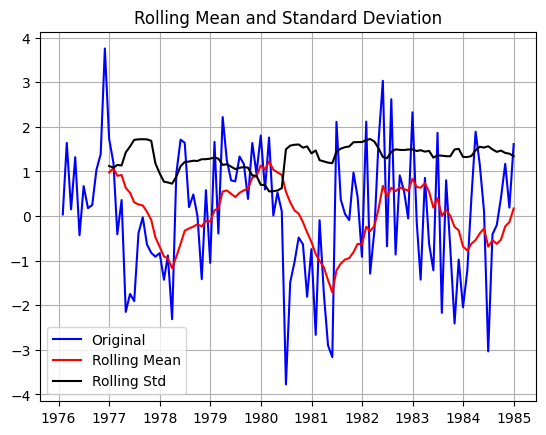

In [24]:
dftest(f75_85["seasonal_diff"].dropna())


In [40]:
f75_85.reset_index(inplace=True)

In [41]:
f75_85.head()

,Date,MAX
0,1975-01-31,27.845161
1,1975-02-28,30.628571
2,1975-03-31,35.016129
3,1975-04-30,36.460000
4,1975-05-31,38.235484


In [68]:
train = f75_85.iloc[:-12 ]
test = f75_85.iloc[-12:]

In [69]:
train.head()

,MAX
Date,
1975-01-31,27.845161
1975-02-28,30.628571
1975-03-31,35.016129
1975-04-30,36.460000
1975-05-31,38.235484


In [70]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaler_train = scaler.transform(train)
scaler_test = scaler.transform(test)

In [72]:
scaler_train.shape


(108, 1)

In [77]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [ ]:
n_input = 12
generator = TimeseriesGenerator(scaler_train, scaler_train, length=n_input, batch_size=1)


In [81]:
len(generator)

96

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [102]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [103]:
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

Model 2

In [174]:
model=Sequential()
model.add(LSTM(100,return_sequences=True,input_shape=(12,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [175]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_15 (LSTM)                  │ (None, 12, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_16 (LSTM)                  │ (None, 12, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_17 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,251 (356.45 KB)

 Trainable params: 91,251 (356.45 KB)

 Non-trainable params: 0 (0.00 B)

In [176]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)


In [204]:
model.fit(generator,epochs=100,callbacks=[early_stop])

Epoch 1/100


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021
Epoch 2/100
44/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014   

C:\Users\dsmat\AppData\Roaming\Python\Python311\site-packages\keras\src\callbacks\early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 3/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 4/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0021
Epoch 5/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0020
Epoch 6/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 9.3661e-04
Epoch 7/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 8/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0017
Epoch 9/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0026
Epoch 10/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0018
Epoch 11/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0014
Epoch 12/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 13/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0015
Epoch 14/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 15/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 16/100
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0013
Epoch 17/10

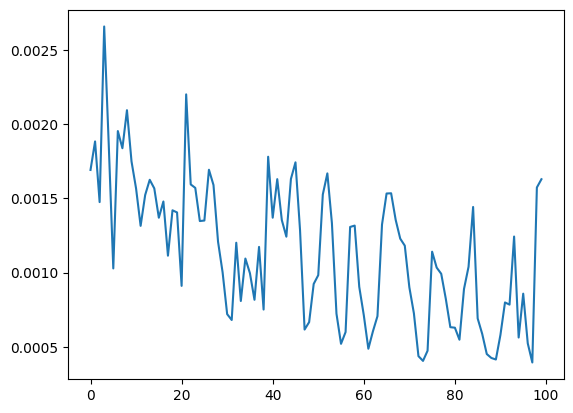

In [205]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [206]:
last_train_batch = scaler_train[-12:]


In [207]:
last_train_batch = last_train_batch.reshape((1, n_input, 1))


In [208]:
model.predict(last_train_batch)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


array([[0.14958742]], dtype=float32)

In [209]:
scaler_test[0]


array([0.06488499])

In [210]:
test_predictions = []

first_eval_batch = scaler_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, 1))

for i in range(len(test)):
    
    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
    
    # append the prediction into the array
    test_predictions.append(current_pred) 
    
    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [211]:
test_predictions

[array([0.14958742], dtype=float32),
 array([0.2816192], dtype=float32),
 array([0.67805827], dtype=float32),
 array([0.8927995], dtype=float32),
 array([0.9380319], dtype=float32),
 array([0.90752035], dtype=float32),
 array([0.49436945], dtype=float32),
 array([0.41678536], dtype=float32),
 array([0.41804597], dtype=float32),
 array([0.46852762], dtype=float32),
 array([0.40179604], dtype=float32),
 array([0.06631537], dtype=float32)]

In [212]:
test.head()

,MAX,Predictions
Date,,
1984-01-31,27.980645,28.913570
1984-02-29,29.903571,30.920472
1984-03-31,36.116129,35.018729
1984-04-30,37.670000,37.355348
1984-05-31,37.429032,37.993684


In [213]:
true_predictions = scaler.inverse_transform(test_predictions)


In [214]:
test['Predictions'] = true_predictions


C:\Users\dsmat\AppData\Local\Temp\ipykernel_10572\2515899287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

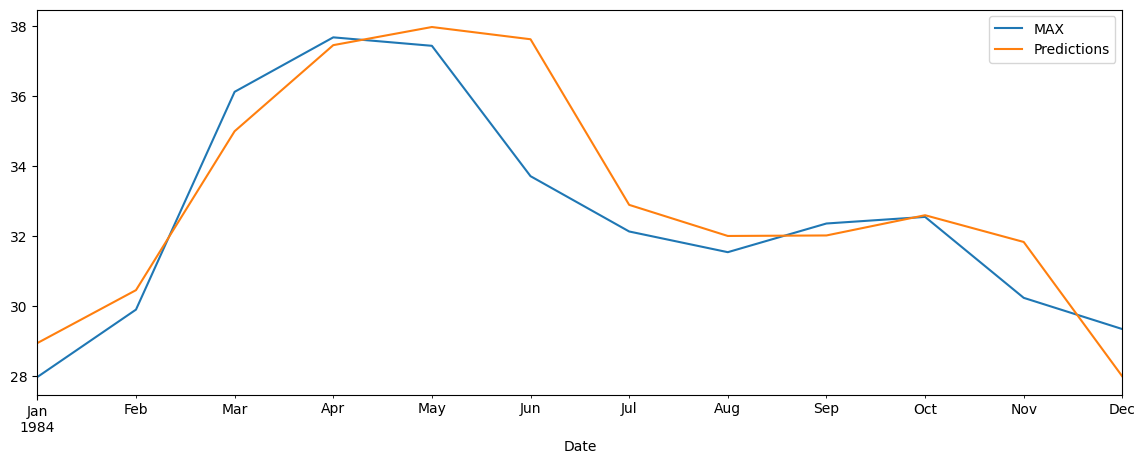

In [215]:
test.plot(figsize=(14,5))


In [216]:

from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['MAX'],test['Predictions']))
print(rmse)

1.3957676200601215


1 layer LSTM Works best for this dataset